<a href="https://colab.research.google.com/github/umairashrafyo/Machine-learning-and-deep-learning/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install nltk
!pip install newspaper3k


     |████████████████████████████████| 211 kB 6.4 MB/s 
     |████████████████████████████████| 7.4 MB 12.6 MB/s 
     |████████████████████████████████| 81 kB 10.1 MB/s 
     |████████████████████████████████| 87 kB 6.9 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13551 sha256=fa8feab791378fa2aaae9bdc4a93499e7c67be2bdc70f55b9702149f9e7ac9f6
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3354 sha256=e717a88cc70083c259968cbfcaa0b3b6ee4dfb2dcfdd9c66ccbdfb27e0ae51d8
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=2bc847028ddd25c0aec02a77995400cf31bd080b5b2d6437db9283bb99c398ab
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a59795743

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[' happy', ' happy', ' attached', ' happy', ' attracted', ' alone', ' free', ' hated', ' happy', ' entitled', ' happy', ' loved', ' hated', ' entitled']
Counter({' happy': 5, ' hated': 2, ' entitled': 2, ' attached': 1, ' attracted': 1, ' alone': 1, ' free': 1, ' loved': 1})
Positive Sentiment


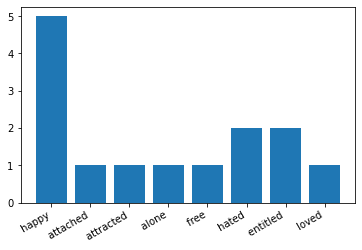

In [8]:
import string
from collections import Counter
  
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

text = open('/content/drive/MyDrive/read.txt', encoding='utf-8').read()
lower_case = text.lower()
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# Using word_tokenize because it's faster than split()
tokenized_words = word_tokenize(cleaned_text, "english")

# Removing Stop Words
final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

# Lemmatization - From plural to single + Base form of a word (example better-> good)
lemma_words = []
for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

emotion_list = []
with open('/content/drive/MyDrive/emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)

print(emotion_list)
w = Counter(emotion_list)
print(w)


def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")


sentiment_analyse(cleaned_text)

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()